In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

In [2]:
!pip install Scikit-fuzzy

  Using cached scikit-fuzzy-0.4.2.tar.gz (993 kB)
  Created wheel for Scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894069 sha256=f286607737b78d66c518b873d81c15f3f5ffa729d0546f0d5f27341532623bbc
  Stored in directory: c:\users\prateek singh\appdata\local\pip\cache\wheels\2c\04\80\7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built Scikit-fuzzy


In [4]:
voltage = ctrl.Antecedent(np.arange(0,850,1), 'voltage')
amplitude = ctrl.Antecedent(np.arange(0,150,1), 'amplitude')



In [5]:
voltage['poor']=fuzz.trimf(voltage.universe, [0,150,379])
voltage['good']=fuzz.trimf(voltage.universe, [379,380,382])
voltage['over']=fuzz.trimf(voltage.universe, [382,500,800])

amplitude['poor']=fuzz.trimf(amplitude.universe, [0,25,49])
amplitude['good']=fuzz.trimf(amplitude.universe, [49,50,52])
amplitude['over']=fuzz.trimf(amplitude.universe, [52,75,100])

C:\Users\Prateek Singh\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


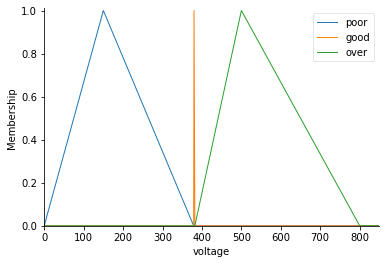

In [6]:
voltage.view()

C:\Users\Prateek Singh\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


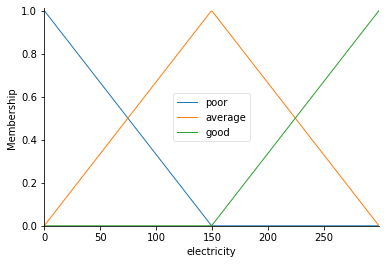

In [8]:
electricity = ctrl.Consequent(np.arange(0,300,1),'electricity')
electricity.automf(3)

electricity.view()

In [11]:
rule1 = ctrl.Rule(voltage['good'] & amplitude['good'], electricity['good'])



In [13]:
rule2 = ctrl.Rule(voltage['poor'] & amplitude['poor'], electricity['poor'])
rule3 = ctrl.Rule(voltage['poor'] & amplitude['over'], electricity['poor'])
rule4 = ctrl.Rule(voltage['poor'] & amplitude['good'], electricity['average'])
rule5 = ctrl.Rule(voltage['over'] & amplitude['poor'], electricity['poor'])
rule6 = ctrl.Rule(voltage['good'] & amplitude['poor'], electricity['average'])
rule7 = ctrl.Rule(voltage['good'] & amplitude['over'], electricity['average'])
rule8 = ctrl.Rule(voltage['poor'] & amplitude['over'], electricity['poor'])
rule9 = ctrl.Rule(voltage['over'] & amplitude['good'], electricity['average'])
rule10 = ctrl.Rule(voltage['over'] & amplitude['over'], electricity['poor'])
rule11 = ctrl.Rule(voltage['poor'] & amplitude['over'], electricity['poor'])




149.49999999999906 W


C:\Users\Prateek Singh\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


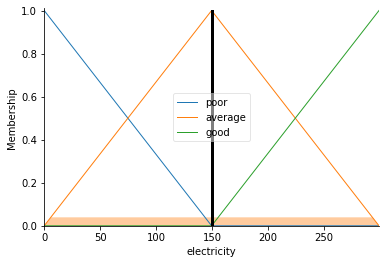

In [19]:

electricity_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7,rule8,rule9,rule10,rule11])
electricityreleased=ctrl.ControlSystemSimulation(electricity_ctrl)
electricityreleased.input['voltage']=370
electricityreleased.input['amplitude']=50
electricityreleased.compute()
print(electricityreleased.output['electricity'],"W")
electricity.view(sim=electricityreleased)